In [2]:
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv('bikes_rent.csv')
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,10.486773,2114
727,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,4.656485,3095
728,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,3.725374,1341
729,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,10.505372,1796


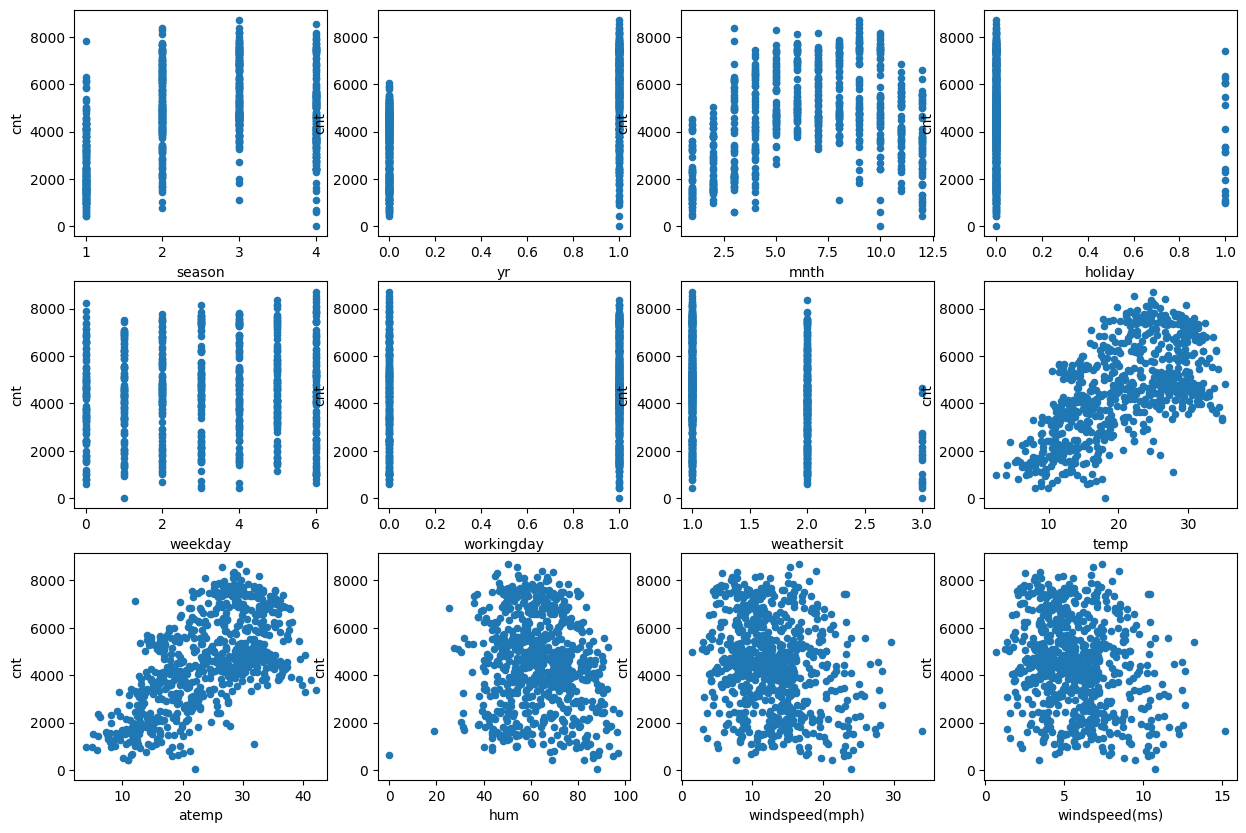

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(df.columns[:-1]):
    df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

In [30]:
df2 = df['cnt']

In [24]:
df1 = df.iloc[:, :-1]
df1

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms)
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,10.486773
727,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,4.656485
728,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,3.725374
729,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,10.505372


In [25]:
df1.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms)
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,-0.229046
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,-0.011817
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,-0.207502
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.006292
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.014282
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.018796
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,0.039511
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,-0.157944
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,-0.183643
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.248489


In [31]:
df1.corrwith(df2)

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64

In [33]:
df3 = df[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']]
df3.corr()

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
temp,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659
windspeed(mph),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
windspeed(ms),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,-0.234545,1.000000


In [34]:
df.mean()

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

In [35]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [38]:
df_shuffled = shuffle(df, random_state=123)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

In [39]:
from sklearn.linear_model import LinearRegression

In [43]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
for i, j in zip(df_shuffled.columns[:-1], lin_reg.coef_):
    print(i, j)

season 570.8653196998313
yr 1021.9660684049363
mnth -141.2994877488561
holiday -86.75716315306167
weekday 137.225332885593
workingday 56.393197884428716
weathersit -330.2335112098689
temp 367.4687310552258
atemp 585.5623555724628
hum -145.60469892530188
windspeed(mph) 12455192348936.28
windspeed(ms) -12455192349134.732


In [44]:
from sklearn.linear_model import Lasso, Ridge


In [46]:
lasso_reg = Lasso()
ridge_reg = Ridge()
lasso_reg.fit(X, y)
ridge_reg.fit(X, y)
print('lassooooooooooooooooooo')
for i, j in zip(df.columns[:-1], lasso_reg.coef_):
    print(i, j)
print('ridgeeeeeeeeeeeeeeeeeee')
for i, j in zip(df.columns[:-1], ridge_reg.coef_):
    print(i, j)

lassooooooooooooooooooo
season 560.2416160308866
yr 1019.4634940657202
mnth -128.73062703678733
holiday -86.15278133371105
weekday 137.3478939049632
workingday 55.21237064135662
weathersit -332.3698569623485
temp 376.3632362096959
atemp 576.5307935045537
hum -144.1291550034859
windspeed(mph) -197.13968940249634
windspeed(ms) -2.803920889847201e-08
ridgeeeeeeeeeeeeeeeeeee
season 563.0645722520153
yr 1018.9483787875274
mnth -131.87332028247528
holiday -86.74609799709249
weekday 138.00511117871926
workingday 55.90311037506435
weathersit -332.3497884990727
temp 386.4578891919085
atemp 566.3470470600672
hum -145.07132729867283
windspeed(mph) -99.25944108185087
windspeed(ms) -99.25944115428189


In [48]:
alphas = np.arange(1, 500, 50)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1])) 
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))

In [56]:
for i, alpha in enumerate(alphas):
    lasso_reg = Lasso(alpha=alpha)
    ridge_reg = Ridge(alpha=alpha)
    lasso_reg.fit(X, y)
    ridge_reg.fit(X, y)
    coefs_lasso[i, :] = lasso_reg.coef_
    coefs_ridge[i, :] = ridge_reg.coef_
print('l', lasso_reg.intercept_.round())
print('r', ridge_reg.intercept_.round())


l 4504.0
r 4504.0


Text(0.5, 1.0, 'Ridge')

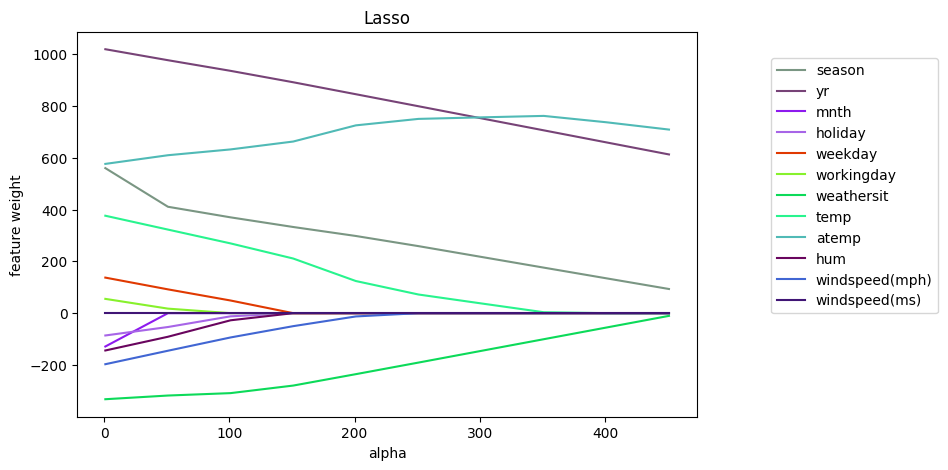

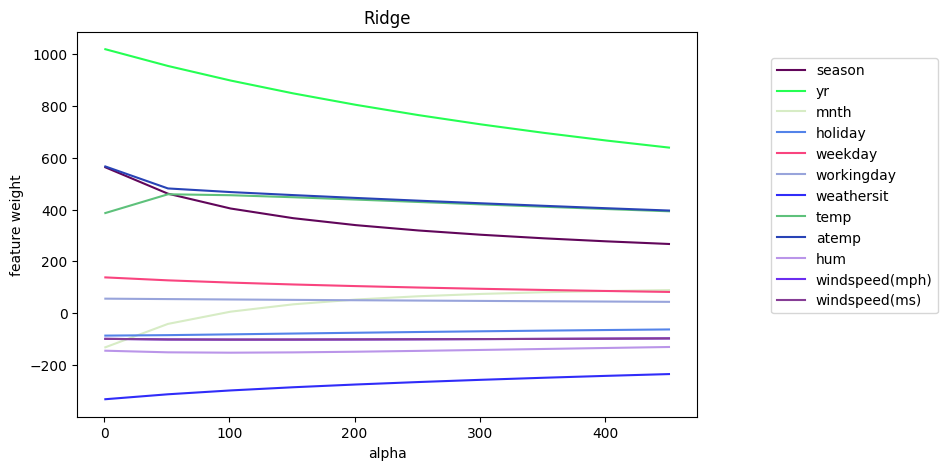

In [52]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

In [57]:
from sklearn.linear_model import LassoCV


In [ ]:
alphas = np.arange(1, 100, 5)


Выбранное значение alpha: 1


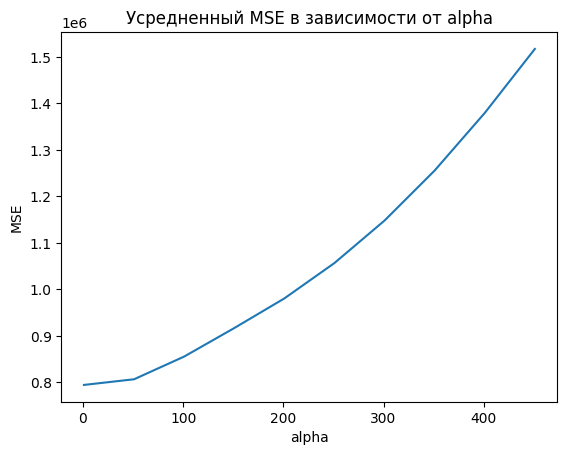


Пары 'признак-коэффициент':
season : 560.2416160308866
yr : 1019.4634940657202
mnth : -128.73062703678733
holiday : -86.15278133371105
weekday : 137.3478939049632
workingday : 55.21237064135662
weathersit : -332.3698569623485
temp : 376.3632362096959
atemp : 576.5307935045537
hum : -144.1291550034859
windspeed(mph) : -197.13968940249634
windspeed(ms) : -2.803920889847201e-08


In [60]:
lcv_reg = LassoCV(alphas=alphas)
lcv_reg.fit(X, y)
print("Выбранное значение alpha:", lcv_reg.alpha_)
plt.plot(lcv_reg.alphas_, lcv_reg.mse_path_.mean(axis=1))
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Усредненный MSE в зависимости от alpha')
plt.show()
print("\nПары 'признак-коэффициент':")
for feature, weight in zip(df.columns[:-1], lcv_reg.coef_):
    print(feature, ":", weight)
